In [2]:
# Importing packages
import pandas as pd
import seaborn as sns

import numpy as np
import scipy.stats as scs

import matplotlib.pyplot as plt

from scipy.stats import t
from scipy.stats import norm
from statsmodels.formula.api import ols

Krav på rapport: Rapporten kan utformas på valfritt sätt, men skall baseras på element från
kursen, t.ex.:  
• Deskriptiva mått som medelvärde, median och standardavvikelse  
• Konfidensintervall  
• Hypotestest  
• Korrelationsanalys  
• Linjär regression  
OBS! - Rapporten behöver inte beskriva hela data-setet i detalj. Välj ut ett fåtal  
variabler/features att fokusera på. Det är viktigare med en bra frågeställning och en tydlig
analys kring frågeställningen, än att inkludera ”så mycket som möjligt”.  
Basera rapporten på statistiska mått och metoder vi gått igenom i kursen. Att inkludera   
massor av andra beräkningspaket/inferensmetoder/etc ger inte högre möjlighet till VG  

In [3]:
filepath = "../Lab/Data/cars.csv"
df = pd.read_csv(filepath)

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
print(df[df["name"].str.contains("volkswagen", case=False, flags=0, na=None, regex=False)]) # Finding out how i can find specific makes in data set.

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
19   26.0          4          97.0        46.0    1835          20.5   
55   27.0          4          97.0        60.0    1834          19.0   
59   23.0          4          97.0        54.0    2254          23.5   
77   22.0          4         121.0        76.0    2511          18.0   
102  26.0          4          97.0        46.0    1950          21.0   
142  26.0          4          79.0        67.0    1963          15.5   
172  25.0          4          90.0        71.0    2223          16.5   
175  29.0          4          90.0        70.0    1937          14.0   
203  29.5          4          97.0        71.0    1825          12.2   
233  29.0          4          97.0        78.0    1940          14.5   
240  30.5          4          97.0        78.0    2190          14.1   
244  43.1          4          90.0        48.0    1985          21.5   
278  31.5          4          89.0        71.0    1990          

In [6]:
#Prediction? Do we need to use data points outside of data set, or can we use datapoints in our data set. For example "Forget the datapoint"
# Least squares.
#

In [7]:
# Creating a copy of df called errors. So that i can later insert my new dataframe into the original dataframe
df_errors = df.copy()

#Splitting columns into make and model.
df_errors[["name", "test"]] = df_errors["name"].str.split(" ", 1, expand=True)
df_errors.rename(columns={"name": "make", "test": "model", "mpg": "l/100km"}, inplace=True)
cars = df_errors
# renaming vw into volkswagen.
cars["make"].replace("vw", "volkswagen", inplace=True)

C:\Users\Agam\AppData\Local\Temp\ipykernel_9308\2948776904.py:5: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df_errors[["name", "test"]] = df_errors["name"].str.split(" ", 1, expand=True)


In [8]:
cars["acceleration"]

0      12.0
1      11.5
2      11.0
3      12.0
4      10.5
       ... 
393    15.6
394    24.6
395    11.6
396    18.6
397    19.4
Name: acceleration, Length: 398, dtype: float64

In [9]:
#conversion variables
pounds_to_kg = 2.2046
mpg_to_lp100km = 235.215

# func for converting values in dataframe.
def conversion(dataframe, conversion, column:str):
    if conversion == pounds_to_kg:
        for p in range(len(dataframe)):
            dataframe[column][p] = round(cars[column][p]*conversion)
        return dataframe
    elif conversion == mpg_to_lp100km:
        for p in range(len(dataframe)):
            dataframe[column][p] = round(mpg_to_lp100km / cars[column][p],2)
        return dataframe
    else: return print("Something went wrong")


In [10]:
cars

,l/100km,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,make,model
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet,chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick,skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth,satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc,rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford,torino
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford,mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,volkswagen,pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge,rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford,ranger


In [11]:
#changing weight into kg's
conversion(cars, pounds_to_kg, "weight")
#changing 
conversion(cars, mpg_to_lp100km,"l/100km")


C:\Users\Agam\AppData\Local\Temp\ipykernel_9308\1078730678.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[column][p] = round(cars[column][p]*conversion)
C:\Users\Agam\AppData\Local\Temp\ipykernel_9308\1078730678.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[column][p] = round(mpg_to_lp100km / cars[column][p],2)


,l/100km,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,make,model
0,13.07,8,307.0,130.0,7725,12.0,70,usa,chevrolet,chevelle malibu
1,15.68,8,350.0,165.0,8142,11.5,70,usa,buick,skylark 320
2,13.07,8,318.0,150.0,7575,11.0,70,usa,plymouth,satellite
3,14.70,8,304.0,150.0,7568,12.0,70,usa,amc,rebel sst
4,13.84,8,302.0,140.0,7604,10.5,70,usa,ford,torino
...,...,...,...,...,...,...,...,...,...,...
393,8.71,4,140.0,86.0,6151,15.6,82,usa,ford,mustang gl
394,5.35,4,97.0,52.0,4696,24.6,82,europe,volkswagen,pickup
395,7.35,4,135.0,84.0,5060,11.6,82,usa,dodge,rampage
396,8.40,4,120.0,79.0,5787,18.6,82,usa,ford,ranger


In [12]:
cars["l/100km"], cars["weight"]

(0      13.07
 1      15.68
 2      13.07
 3      14.70
 4      13.84
        ...  
 393     8.71
 394     5.35
 395     7.35
 396     8.40
 397     7.59
 Name: l/100km, Length: 398, dtype: float64,
 0      7725
 1      8142
 2      7575
 3      7568
 4      7604
        ... 
 393    6151
 394    4696
 395    5060
 396    5787
 397    5997
 Name: weight, Length: 398, dtype: int64)

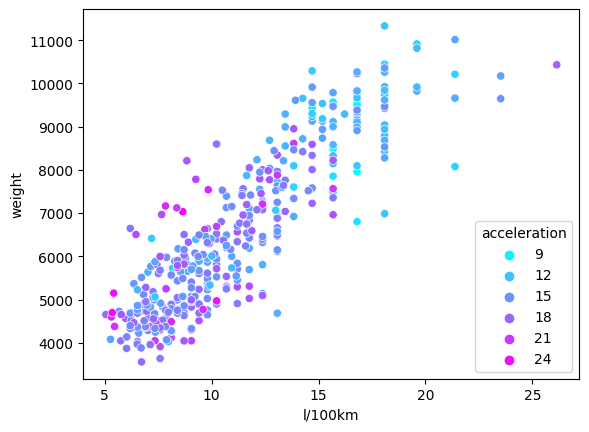

In [18]:
sns.scatterplot(data=cars, x="l/100km", y="weight", hue="acceleration", palette="cool")
plt.show()

In [22]:
model = ols("l/100km weight", data=cars,).fit()
print(model.summary())

SyntaxError: invalid syntax (<unknown>, line 1)